#### Bertrand's paradox

The Bertrand paradox is generally presented as follows: Consider an equilateral triangle inscribed in a circle. Suppose a chord of the circle is chosen at random. What is the probability that the chord is longer than a side of the triangle?

Bertrand came up with three different ways to choose a random chord, each of which leads to a different answer!

In this notebook, we investigate these methods.






In [1]:
import numpy as np
import matplotlib.pyplot as plt

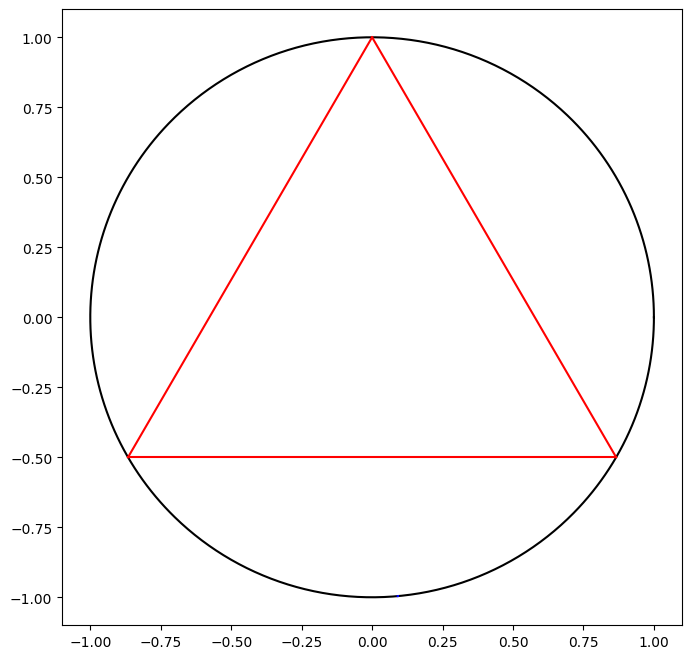

In [2]:
fig, ax = plt.subplots(1,1,figsize=(8,8))

# Generate two random points on the circle
theta1 = np.random.uniform(0, 2*np.pi)
xi1 = np.cos(theta1)
yi1 = np.sin(theta1)

theta2 = np.random.uniform(0, 2*np.pi)
xi2 = np.cos(theta2)
yi2 = np.sin(theta2)

length1 = np.sqrt((xi1-xi2)**2 + (yi1-yi2)**2)

thetac = np.linspace(0, 2*np.pi, 1000)
xc = np.cos(thetac)
yc = np.sin(thetac)
ax.plot(xc, yc, 'k')

ax.plot([0, np.sqrt(3)/2], [1, -0.5], 'r')
ax.plot([0, -np.sqrt(3)/2], [1, -0.5], 'r')
ax.plot([-np.sqrt(3)/2, np.sqrt(3)/2], [-0.5, -0.5], 'r')

ax.plot([xi1, xi2], [yi1, yi2], 'b')

plt.show()

### Method 1

The first method is call the random endpoints method.  The algorithm is as follows:

1. Choose two random points on the circle, at random positions.
2. Calculate the length of the chord that joins them.

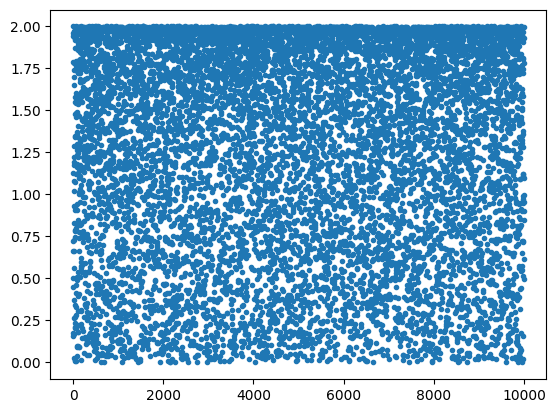

In [3]:
# Generate random points on the circle

n = 10000   # number of points

theta1 = np.random.uniform(0, 2*np.pi, n)
xi1 = np.cos(theta1)
yi1 = np.sin(theta1)

theta2 = np.random.uniform(0, 2*np.pi, n)
xi2 = np.cos(theta2)
yi2 = np.sin(theta2)

length1 = np.sqrt((xi1-xi2)**2 + (yi1-yi2)**2)

plt.plot(np.arange(n), length1, '.')


Method 1 probability = 0.3289


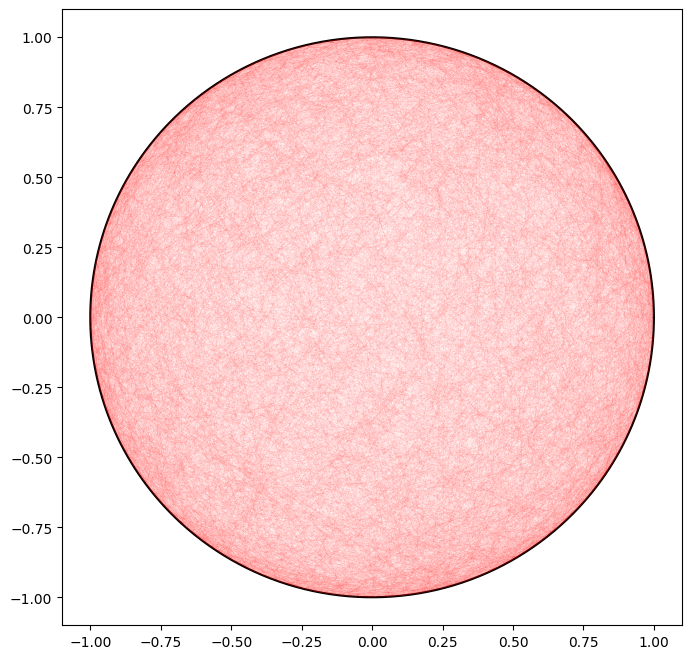

In [4]:
fig, ax = plt.subplots(1,1,figsize=(8,8))

thetac = np.linspace(0, 2*np.pi, 1000)
xc = np.cos(thetac)
yc = np.sin(thetac)
ax.plot(xc, yc, 'k')

count1 = 0
for i in range(n):
    if length1[i] > np.sqrt(3):
        count1 += 1
    ax.plot([xi1[i], xi2[i]], [yi1[i], yi2[i]], 'r', linewidth=0.01)

print(f"Method 1 probability = {count1/n}")
plt.show()

### Method 2

The second method is called the random radial method. The algorithm is as follows:

1. Choose a random point on the circle.
2. Construct the radius from the centre of the circle to this point.
3. Choose a random point on this radius.
4. Construct the chord perpendicular to the radius at this point.
5. Calculate the length of the chord.

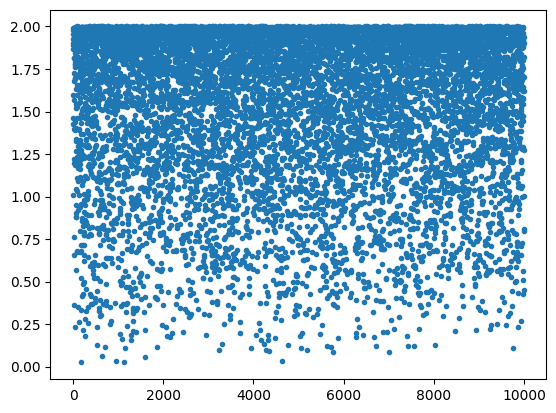

In [5]:
# Step 1 and 2
theta = np.random.uniform(0, 2*np.pi, n)
x = np.cos(theta)
y = np.sin(theta)

# Step 3
fraction = np.random.uniform(0, 1, n)
x1 = fraction*x
y1 = fraction*y

m = -x1/y1
b = y1 - m*x1

# Step 4
# From Wolfram-Alpha, find intersection of circle of radius 1 and the line y = mx + b

xint1 = (-np.sqrt(-b**2+m**2+1) - b*m)/(m**2+1)
yint1 = m*xint1 + b

xint2 = (np.sqrt(-b**2+m**2+1) - b*m)/(m**2+1)
yint2 = m*xint2 + b

length2 = np.sqrt((xint1-xint2)**2 + (yint1-yint2)**2)

plt.plot(np.arange(n), length2, '.')

#print (xint1, yint1)
#print (xint2, yint2)

Method 2 probability = 0.4928


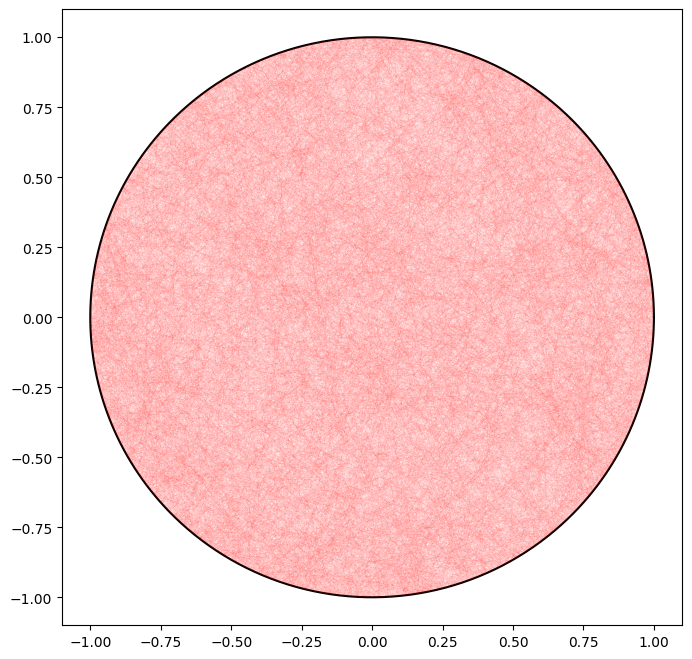

In [6]:
fig, ax = plt.subplots(1,1,figsize=(8,8))

thetac = np.linspace(0, 2*np.pi, 1000)
xc = np.cos(thetac)
yc = np.sin(thetac)
ax.plot(xc, yc, 'k')

count2 = 0
for i in range(n):
    if length2[i] > np.sqrt(3):
        count2 += 1
    ax.plot([xint1[i], xint2[i]], [yint1[i], yint2[i]], 'r', linewidth=0.01)

print(f"Method 2 probability = {count2/n}")
plt.show()

### Method 3

The third method is called the random midpoint method. The algorithm is as follows:

1. Choose a random point within the circle.
2. Construct the chord with this point as its midpoint.
3. Calculate the length of the chord.

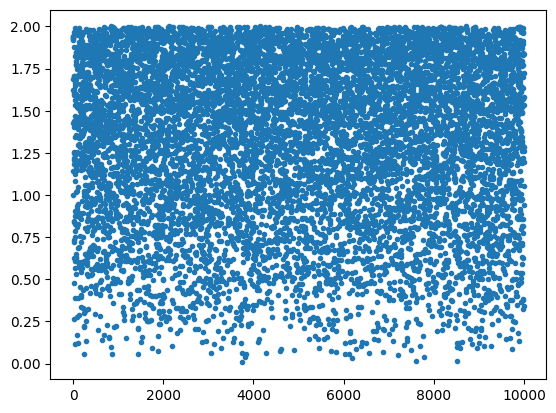

In [7]:
# Step 1
chosen = 0
length3 = np.zeros(n)
xint3 = np.zeros(n)
xint4 = np.zeros(n)
yint3 = np.zeros(n)
yint4 = np.zeros(n)

while chosen < n:
    x1 = np.random.uniform(-1, 1)
    y1 = np.random.uniform(-1, 1)
    radius = np.sqrt(x1**2 + y1**2)

    if radius <= 1:

        # Step 2
        m = -x1/y1
        b = y1 - m*x1

        xint3[chosen] = (-np.sqrt(-b**2+m**2+1) - b*m)/(m**2+1)
        yint3[chosen] = m*xint3[chosen] + b

        xint4[chosen] = (np.sqrt(-b**2+m**2+1) - b*m)/(m**2+1)
        yint4[chosen] = m*xint4[chosen] + b

        length3[chosen] = np.sqrt((xint3[chosen]-xint4[chosen])**2 + (yint3[chosen]-yint4[chosen])**2)
        chosen += 1

plt.plot(np.arange(n), length3, '.')


Method 2 probability = 0.2567


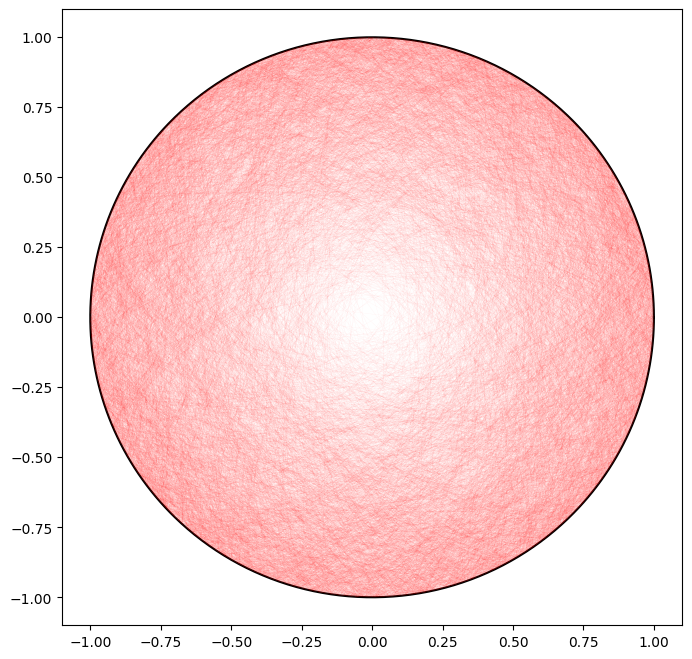

In [8]:
fig, ax = plt.subplots(1,1,figsize=(8,8))

thetac = np.linspace(0, 2*np.pi, 1000)
xc = np.cos(thetac)
yc = np.sin(thetac)
ax.plot(xc, yc, 'k')

count3 = 0
for i in range(n):
    if length3[i] > np.sqrt(3):
        count3 += 1
    ax.plot([xint3[i], xint4[i]], [yint3[i], yint4[i]], 'r', linewidth=0.01)

print(f"Method 2 probability = {count3/n}")
plt.show()

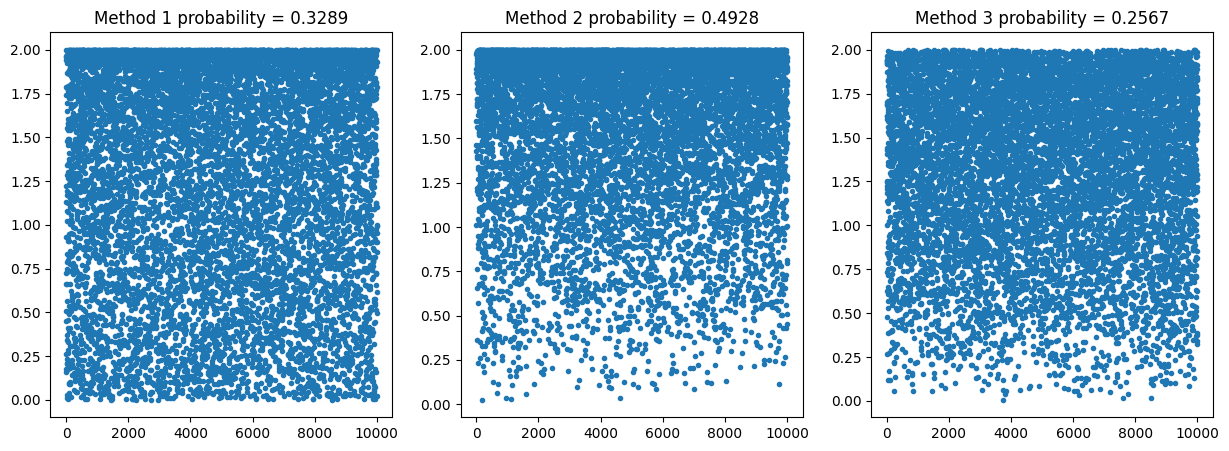

In [9]:
fix, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(np.arange(n), length1, '.')
ax[0].set_title(f"Method 1 probability = {count1/n}")
ax[1].plot(np.arange(n), length2, '.')
ax[1].set_title(f"Method 2 probability = {count2/n}")
ax[2].plot(np.arange(n), length3, '.')
ax[2].set_title(f"Method 3 probability = {count3/n}")
plt.show()

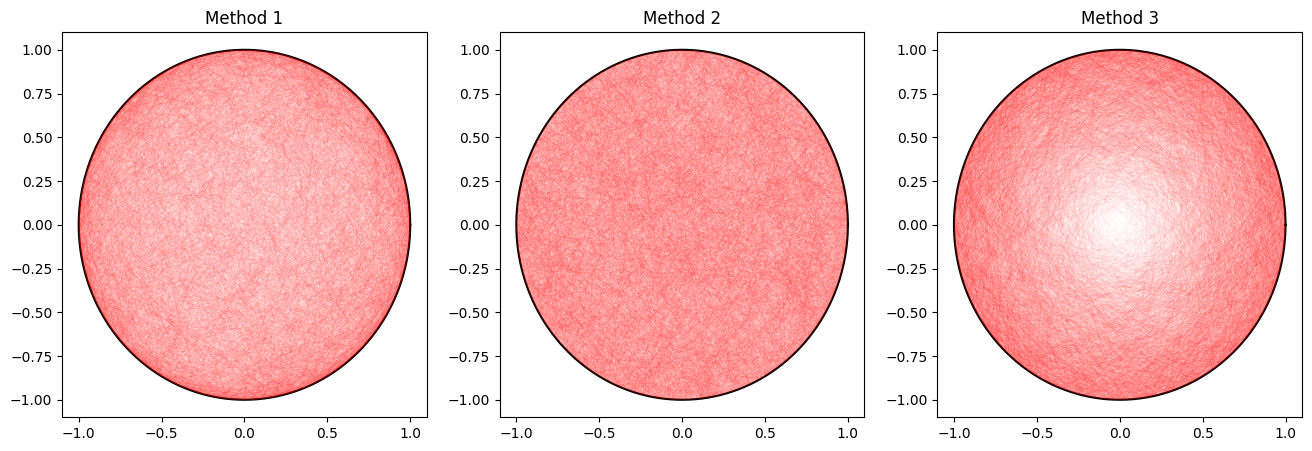

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5))

ax[0].set_title("Method 1")
ax[0].plot(xc, yc, 'k')
for i in range(n):
    ax[0].plot([xi1[i], xi2[i]], [yi1[i], yi2[i]], 'r', linewidth=0.01)

ax[1].set_title("Method 2")
ax[1].plot(xc, yc, 'k')
for i in range(n):
    ax[1].plot([xint1[i], xint2[i]], [yint1[i], yint2[i]], 'r', linewidth=0.01)

ax[2].set_title("Method 3")
ax[2].plot(xc, yc, 'k')
for i in range(n):
    ax[2].plot([xint3[i], xint4[i]], [yint3[i], yint4[i]], 'r', linewidth=0.01)

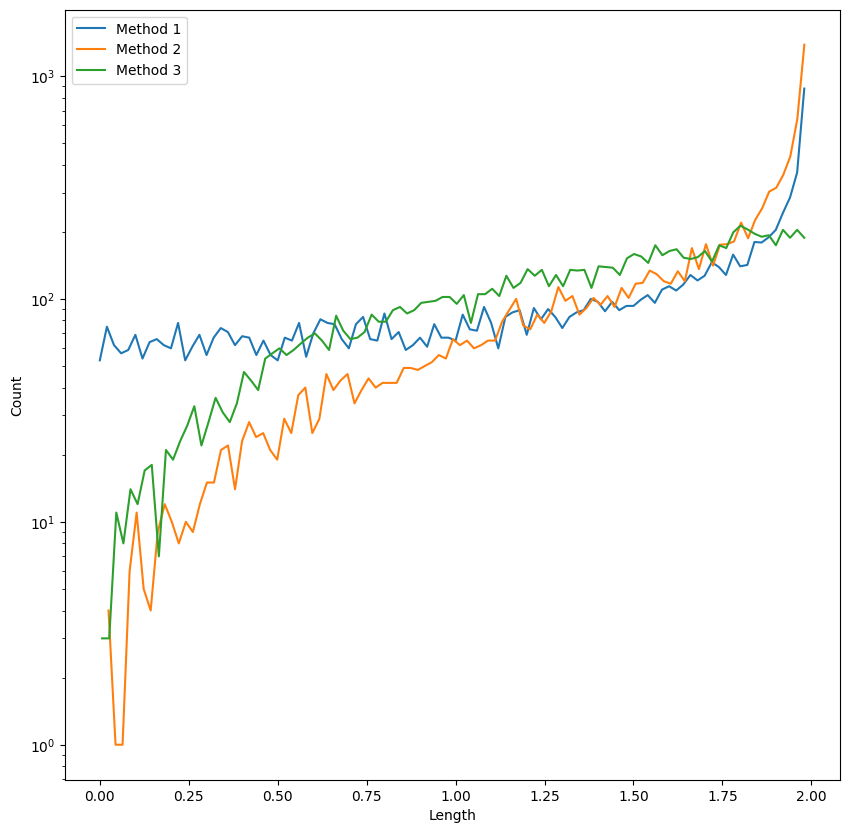

In [11]:
fig = plt.figure(figsize=(10, 10))
counts, bins = np.histogram(length1, bins=100)
plt.plot(bins[:-1], counts, label="Method 1")
counts, bins = np.histogram(length2, bins=100)
plt.plot(bins[:-1], counts, label="Method 2")
counts, bins = np.histogram(length3, bins=100)
plt.plot(bins[:-1], counts, label="Method 3")
plt.yscale('log')
plt.ylabel("Count")
plt.xlabel("Length")
plt.legend()
plt.show()


# Homework

Use the following algorithm:
1) Generate a point randomly within the circle.
2) Choose a random angle for a chord passing through that point.
3) Calculate the length of the chord passing through that point, at the chosen random angle.


## The Math

Given a coordinate I'll call $(x_1,y_1)$ that lies on the circle (radius = 1) around the origin and a random angle, find the chord.

Since the form of a line is $y=mx+b$, I need $m$ and $b$. First I'll find $m$, and to do that I'll pick a point one unit of distance away from the initial point. This point will be called $(x_2,y_2)$.
$$
x_2 = x_1 + \cos{\theta}\\
y_2 = y_1 + \sin{\theta}
$$
The slope is $m=\frac{\Delta y}{\Delta x}$, so I'll calculate that for the two points I have.
$$
m=\frac{y_2-y_1}{x_2-x_1}=\frac{y_1+\sin{\theta} - y_1}{x_1+\cos{\theta} - x_1}=\tan{\theta}
$$
Now I can find $b$ by plugging in my initial point.
$$y_1=x\tan{\theta}+b$$ So $$b=y_1-x_1\tan{\theta}$$



angle = 0.08731795750654818 rad or 5.002950440827876 deg
y=0.08754055282230147x+0.014056959666100422
0.08441369291605429 -0.0893359089967392


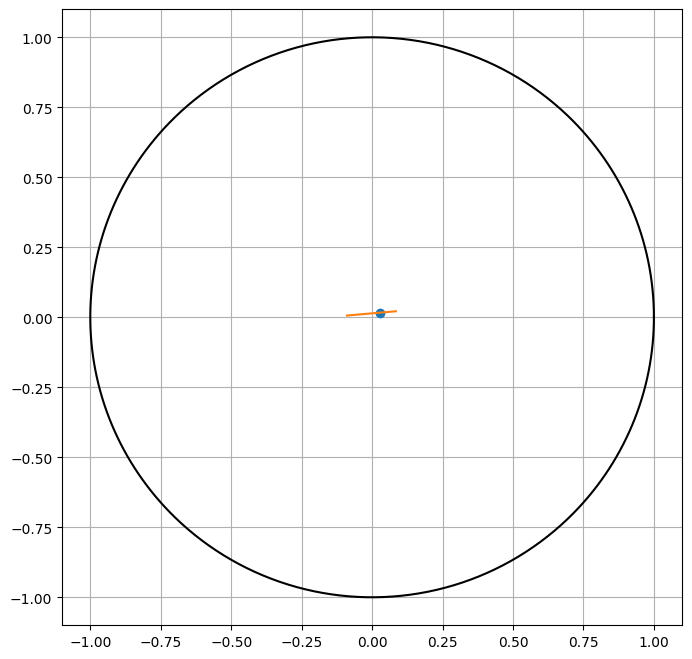

In [17]:
# starting with one point for demonstration purposes

fig, ax = plt.subplots(1,1,figsize=(8,8))

thetac = np.linspace(0, 2*np.pi, 1000)
xc = np.cos(thetac)
yc = np.sin(thetac)
ax.plot(xc, yc, 'k')

# pick random point
x = 1
y = 1
length = np.sqrt(x**2+y**2)
while length >= 1:
    x = np.random.uniform(-1,1)
    y = np.random.uniform(-1,1)
    length = np.sqrt(x**2+y**2)

plt.plot(x,y, 'o')

angle = np.random.uniform(0, 2*np.pi)
print(f"angle = {angle} rad or {np.rad2deg(angle)} deg")
if (angle == np.pi/2) or (angle == 3*np.pi/2):
    x_int1 = x
    x_int2 = x
# Find line and plot it
m = np.tan(angle)
b = y - (m*x)
print(f"y={m}x+{b}")
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)

x_int1 = (-2*m*b)+np.sqrt((4*m**2*b**2)-(4*(m**2)*(b**2-1)))/(2*(m**2+1))
x_int2 = (-2*m*b)-np.sqrt(4*m**2*b**2-4*(m**2)*(b**2-1))/(2*(m**2+1))
print(x_int1, x_int2)

if x_int2 > x_int1:
    x_line = np.linspace(x_int1,x_int2,100)
else:
    x_line = np.linspace(x_int2,x_int1,100)

y_line = m*x_line+b
plt.plot(x_line,y_line)
plt.grid()


In [13]:
# Step 1: Generate a random point on the circle (n times)

n = 10000

chosen = 0
x_chosen = np.zeros(n)
y_chosen = np.zeros(n)
angle = np.zeros(n)

while chosen < n:
    x = np.random.uniform(-1,1)
    y = np.random.uniform(-1,1)
    radius = np.sqrt(x**2 + y**2)
    
    if radius <= 1:
        x_chosen[chosen] = x
        y_chosen[chosen] = y
        
        # Step 2: choose a random angle for a chord passing through that point
        angle = np.random.uniform(0, 2*np.pi)
        angle[chosen] = angle
        
        # Step 3: Calculate the length of the chord passing through that point, at the chosen random angle
        # line: 
        
    chosen += 1
    

fig = plt.figure()
plt.plot(x_chosen, y_chosen, '.')

TypeError: 'float' object does not support item assignment

In [ ]:
# Choose a random angle for the chord passing through that point
